In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

import math

In [2]:
imputer_knn = KNNImputer(n_neighbors=5, weights='uniform')

# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\tracks'

# List to store the individual DataFrames
dfs = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        #print(file_path)
        df = pd.read_csv(file_path, header = 2)
        df = df.drop(0)
        df.index = df.index -1    #Set the index rigth
        columns_drop = [0,3,6,9,12,15,18,21,24,27,30,33,36,39,42]
        df = df.drop(df.columns[columns_drop], axis=1)
        df_imputed_np= imputer_knn.fit_transform(df)
        df_imputed_final = pd.DataFrame(df_imputed_np, columns=df.columns)
        
        dfs.append(df_imputed_final)

C:\Users\raulo\AppData\Local\Temp\ipykernel_20184\740780530.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_20184\740780530.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData\Local\Temp\ipykernel_20184\740780530.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header = 2)
C:\Users\raulo\AppData

In [3]:
# Directory path where the CSV files are located
directory = r'C:\Users\raulo\Desktop\CódigoTese\Labels'

# List to store the individual DataFrames
dfs_labels = []

# Get the list of file names in alphabetical order
file_names = sorted(os.listdir(directory))

# Iterate over the files in the directory
for filename in file_names:
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        df = df.drop(columns='Unnamed: 0')
        #print(file_path)
        dfs_labels.append(df)

dfs_labels_single = []
for df in dfs_labels:
    # Convert DataFrame into a single-column DataFrame
    single_column_df = pd.DataFrame(df.idxmax(axis=1), columns=['Interaction'])
    dfs_labels_single.append(single_column_df)

In [4]:
# Create a list to store the labeled DataFrames
labeled_dfs = []

# Iterate over the DataFrames
for i in range(len(dfs)):
    # Add the labels DataFrame in front of each DataFrame
    labeled_df = pd.concat([dfs_labels_single[i], dfs[i]], axis=1)
    labeled_dfs.append(labeled_df)

# Concatenate the labeled DataFrames vertically
merged_df = pd.concat(labeled_dfs, ignore_index=True)

# Print the merged DataFrame
print(merged_df)

       Interaction  Client_Mouth  Client_Mouth.1  Client_Spine_head  \
0       background       844.539         805.387            797.075   
1       background       845.803         805.719            800.320   
2       background       846.058         805.602            800.390   
3       background       847.783         806.855            800.559   
4       background       848.311         806.531            801.088   
...            ...           ...             ...                ...   
602739  background      1263.867         974.489           1222.146   
602740  background      1263.782         974.429           1221.320   
602741  background      1263.192         975.049           1221.697   
602742  background      1262.779         975.279           1222.167   
602743  background      1262.617         975.332           1222.376   

        Client_Spine_head.1  Client_Spine_tail  Client_Spine_tail.1  \
0                   778.293            758.091              754.712   
1    

In [5]:
###
##
###
##
###
##

In [108]:
data = merged_df
data_behavior_distance = pd.DataFrame(data['Interaction'], columns=['Interaction'])
data_behavior_distance['Distance'] = np.nan
data_behavior_distance['Angle'] = np.nan
data_behavior_distance["Interaction"].value_counts()

background     594156
Int_Client       5524
TS               1474
Int_Cleaner       955
Jolt              490
Run               145
Name: Interaction, dtype: int64

## Distances calculation

In [111]:
for index, row in data.iterrows():
    client_x_coords = row.iloc[range(1, 21, 2)].values
    client_y_coords = row.iloc[range(2, 22, 2)].values
    centroid_x_client = np.mean(client_x_coords)
    centroid_y_client = np.mean(client_y_coords)

    cleaner_x_coords = row.iloc[range(21, 29, 2)].values
    cleaner_y_coords = row.iloc[range(22, 30, 2)].values
    centroid_x_cleaner = np.mean(cleaner_x_coords)
    centroid_y_cleaner = np.mean(cleaner_y_coords)

    distance = np.sqrt((centroid_x_cleaner - centroid_x_client)**2 + (centroid_y_cleaner - centroid_y_client)**2)
    data_behavior_distance.at[index, 'Distance'] = distance  # Set the distance value for the current row in the DataFrame

In [112]:
# Filter the DataFrame for each behavior
background_data = data_behavior_distance[data_behavior_distance['Interaction'] == 'background']
Int_client_data = data_behavior_distance[data_behavior_distance['Interaction'] == 'Int_Client']
TS_data = data_behavior_distance[data_behavior_distance['Interaction'] == 'TS']
Int_Cleaner_data = data_behavior_distance[data_behavior_distance['Interaction'] == 'Int_Cleaner']
Run_data = data_behavior_distance[data_behavior_distance['Interaction'] == 'Run']
Jolt_data = data_behavior_distance[data_behavior_distance['Interaction'] == 'Jolt']   

# Get the distances for each behavior
background_distances = background_data['Distance']
Int_Client_distances = Int_client_data['Distance']
TS_distances  = TS_data['Distance']
Int_Cleaner_distances  = Int_Cleaner_data['Distance']
Run_distances  = Run_data['Distance']
Jolt_distances  = Jolt_data['Distance']

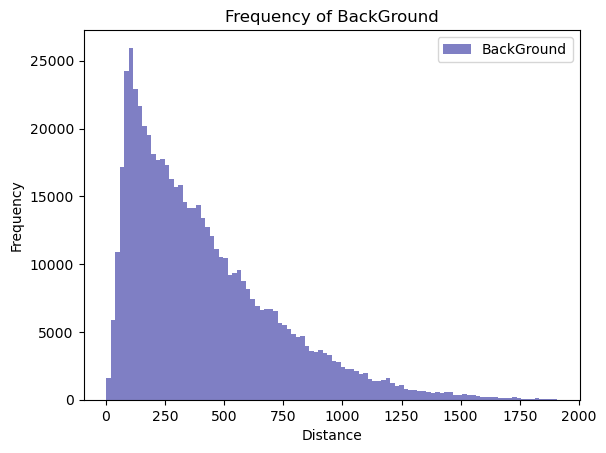

In [113]:
# Create a histogram for the "client starts" behavior
plt.hist(background_distances, bins=100, color='darkblue', alpha=0.5, label='BackGround')

# Set labels and title for the plot
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Frequency of BackGround')

# Add a legend
plt.legend()

# Display the plot
plt.show()

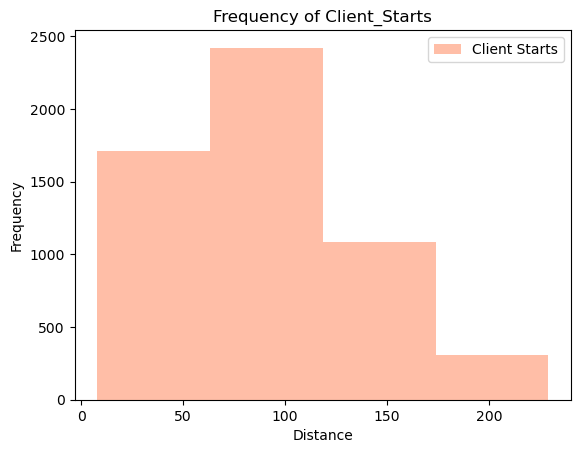

The max value in Danielle's data for Client_Starting is 229.075617.


In [114]:
# Create a histogram for the "client starts" behavior
plt.hist(Int_Client_distances, bins=4, color='coral', alpha=0.5, label='Client Starts')

# Set labels and title for the plot
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Frequency of Client_Starts')

# Add a legend
plt.legend()

# Display the plot
plt.show()

print("The max value in Danielle's data for \033[1mClient_Starting\033[0m is \033[1m%f\033[0m." % max(Int_Client_distances))

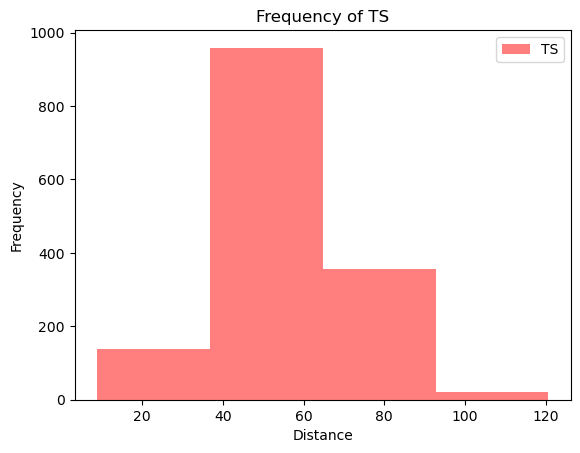

The max value in Danielle's data for TS is 120.586662.


In [115]:
# Create a histogram for the "client starts" behavior
plt.hist(TS_distances, bins=4, color='r', alpha=0.5, label='TS')

# Set labels and title for the plot
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Frequency of TS')

# Add a legend
plt.legend()

# Display the plot
plt.show()

print("The max value in Danielle's data for \033[1mTS\033[0m is \033[1m%f\033[0m." % max(TS_distances))

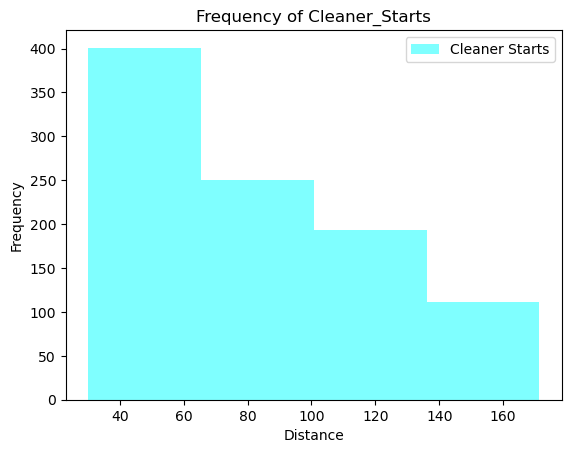

The max value in Danielle's data for Cleaner_Starting is 171.329386.


In [116]:
# Create a histogram for the "client starts" behavior
plt.hist(Int_Cleaner_distances, bins=4, color='aqua', alpha=0.5, label='Cleaner Starts')

# Set labels and title for the plot
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Frequency of Cleaner_Starts')

# Add a legend
plt.legend()

# Display the plot
plt.show()

print("The max value in Danielle's data for \033[1mCleaner_Starting\033[0m is \033[1m%f\033[0m." % max(Int_Cleaner_distances))

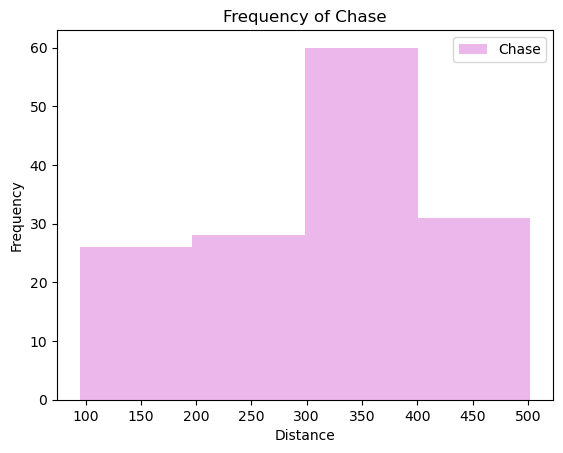

The max value in Danielle's data for Chase is 502.276430.


In [117]:
# Create a histogram for the "client starts" behavior
plt.hist(Run_distances , bins=4, color='orchid', alpha=0.5, label='Chase')

# Set labels and title for the plot
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Frequency of Chase')

# Add a legend
plt.legend()

# Display the plot
plt.show()

print("The max value in Danielle's data for \033[1mChase\033[0m is \033[1m%f\033[0m." % max(Run_distances))

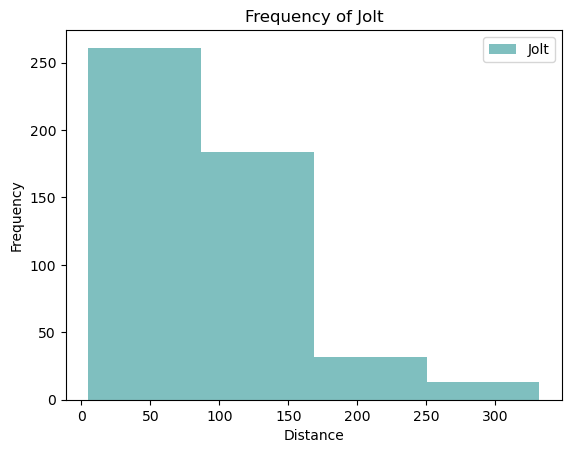

The max value in Danielle's data for Jolt is 332.034358.


In [118]:
# Create a histogram for the "client starts" behavior
plt.hist(Jolt_distances , bins=4, color='teal', alpha=0.5, label='Jolt')

# Set labels and title for the plot
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Frequency of Jolt')

# Add a legend
plt.legend()

# Display the plot
plt.show()

print("The max value in Danielle's data for \033[1mJolt\033[0m is \033[1m%f\033[0m." % max(Jolt_distances))

In [119]:
print("The max value in Danielle's data for \033[1mClient_Starting\033[0m is \033[1m%f\033[0m." % max(Int_Client_distances))
print("The max value in Danielle's data for \033[1mTS\033[0m is \033[1m%f\033[0m." % max(TS_distances))
print("The max value in Danielle's data for \033[1mCleaner_Starting\033[0m is \033[1m%f\033[0m." % max(Int_Cleaner_distances))
print("The max value in Danielle's data for \033[1mChase\033[0m is \033[1m%f\033[0m." % max(Run_distances))
print("The max value in Danielle's data for \033[1mJolt\033[0m is \033[1m%f\033[0m." % max(Jolt_distances))

The max value in Danielle's data for Client_Starting is 229.075617.
The max value in Danielle's data for TS is 120.586662.
The max value in Danielle's data for Cleaner_Starting is 171.329386.
The max value in Danielle's data for Chase is 502.276430.
The max value in Danielle's data for Jolt is 332.034358.


In [120]:
print("There are \033[1m%i\033[0m frames or %i minutes under the 200 distance mark, where \033[1mBackground\033[0m happened in the danielle's data." % ((background_distances < 200).sum().sum(), (background_distances < 200).sum().sum()/60/60))
print("There are \033[1m%i\033[0m frames under the 250 distance mark, where \033[1mBackground\033[0m happened in the danielle's data." % (background_distances < 250).sum().sum())

There are 178158 frames or 49 minutes under the 200 distance mark, where Background happened in the danielle's data.
There are 224836 frames under the 250 distance mark, where Background happened in the danielle's data.


## Angle calculations

In [121]:
def slope(x_coords, y_coords):
    if np.isclose(x_coords[0], x_coords[1]):
        return np.inf
    return (y_coords[1] - y_coords[0]) / (x_coords[1] - x_coords[0])

def angle(s1, s2):
    if np.isclose(s2, s1):
        return 0.0
    return math.degrees(math.atan((s2 - s1) / (1 + (s2 * s1))))

In [122]:
for index, row in data.iterrows():
    client_x_coords = data.iloc[index, [1,15]].values
    client_y_coords = data.iloc[index, [2,16]].values
    cleaner_x_coords = data.iloc[index, [21,27]].values
    cleaner_y_coords = data.iloc[index, [22,28]].values
    
    slope1 = slope(client_x_coords, client_y_coords)
    slope2 = slope(cleaner_x_coords, cleaner_y_coords)
    
    ang = angle(slope1, slope2)
    
    data_behavior_distance.at[index, 'Angle'] = ang  # Set the angle value for the current row in the DataFrame
    
    # Print values every 10,000 index
    if index % 10000 == 0:
        print(f"Index: {index}")

Index: 0


C:\Users\raulo\AppData\Local\Temp\ipykernel_20184\2313574509.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return math.degrees(math.atan((s2 - s1) / (1 + (s2 * s1))))


Index: 10000
Index: 20000
Index: 30000
Index: 40000
Index: 50000
Index: 60000
Index: 70000
Index: 80000
Index: 90000
Index: 100000
Index: 110000
Index: 120000
Index: 130000
Index: 140000
Index: 150000
Index: 160000
Index: 170000
Index: 180000
Index: 190000
Index: 200000
Index: 210000
Index: 220000
Index: 230000
Index: 240000
Index: 250000
Index: 260000
Index: 270000
Index: 280000
Index: 290000
Index: 300000
Index: 310000
Index: 320000
Index: 330000
Index: 340000
Index: 350000
Index: 360000
Index: 370000
Index: 380000
Index: 390000
Index: 400000
Index: 410000
Index: 420000
Index: 430000
Index: 440000
Index: 450000
Index: 460000
Index: 470000
Index: 480000
Index: 490000
Index: 500000
Index: 510000
Index: 520000
Index: 530000
Index: 540000
Index: 550000
Index: 560000
Index: 570000
Index: 580000
Index: 590000
Index: 600000


In [123]:
background_data_angle = data_behavior_distance[data_behavior_distance['Interaction'] == 'background']
Int_client_data_angle = data_behavior_distance[data_behavior_distance['Interaction'] == 'Int_Client']
TS_data_angle = data_behavior_distance[data_behavior_distance['Interaction'] == 'TS']
Int_Cleaner_data_angle = data_behavior_distance[data_behavior_distance['Interaction'] == 'Int_Cleaner']
Run_data_angle = data_behavior_distance[data_behavior_distance['Interaction'] == 'Run']
Jolt_data_angle = data_behavior_distance[data_behavior_distance['Interaction'] == 'Jolt']

# Get the angles for each behavior
background_angles = background_data_angle['Angle']
Int_Client_angles = Int_client_data_angle['Angle']
TS_angles  = TS_data_angle['Angle']
Int_Cleaner_angles  = Int_Cleaner_data_angle['Angle']
Run_angles  = Run_data_angle['Angle']
Jolt_angles  = Jolt_data_angle['Angle']

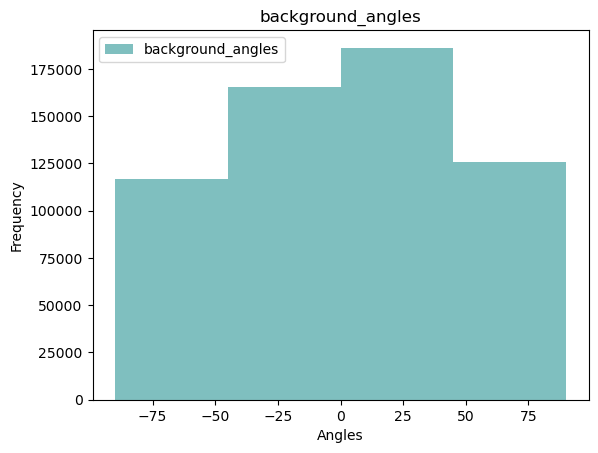

In [124]:
# Create a histogram for the "client starts" behavior
plt.hist(background_angles , bins=4, color='teal', alpha=0.5, label='background_angles')

# Set labels and title for the plot
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.title('background_angles')

# Add a legend
plt.legend()

# Display the plot
plt.show()

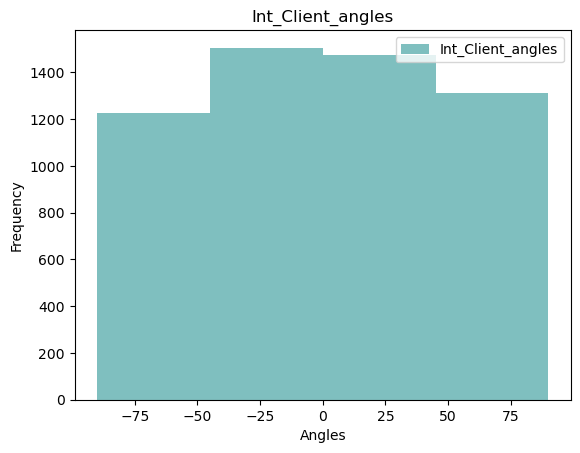

In [125]:
# Create a histogram for the "client starts" behavior
plt.hist(Int_Client_angles , bins=4, color='teal', alpha=0.5, label='Int_Client_angles')

# Set labels and title for the plot
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.title('Int_Client_angles')

# Add a legend
plt.legend()

# Display the plot
plt.show()

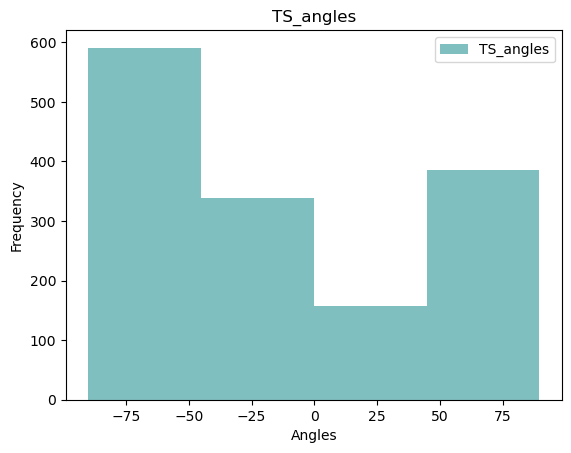

In [126]:
# Create a histogram for the "client starts" behavior
plt.hist(TS_angles , bins=4, color='teal', alpha=0.5, label='TS_angles')

# Set labels and title for the plot
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.title('TS_angles')

# Add a legend
plt.legend()

# Display the plot
plt.show()

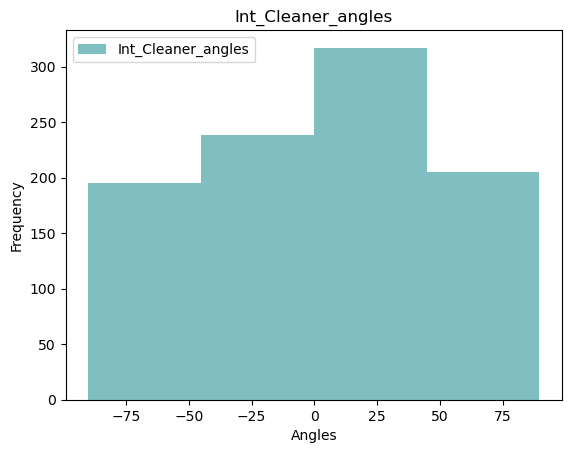

In [127]:
# Create a histogram for the "client starts" behavior
plt.hist(Int_Cleaner_angles , bins=4, color='teal', alpha=0.5, label='Int_Cleaner_angles')

# Set labels and title for the plot
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.title('Int_Cleaner_angles')

# Add a legend
plt.legend()

# Display the plot
plt.show()

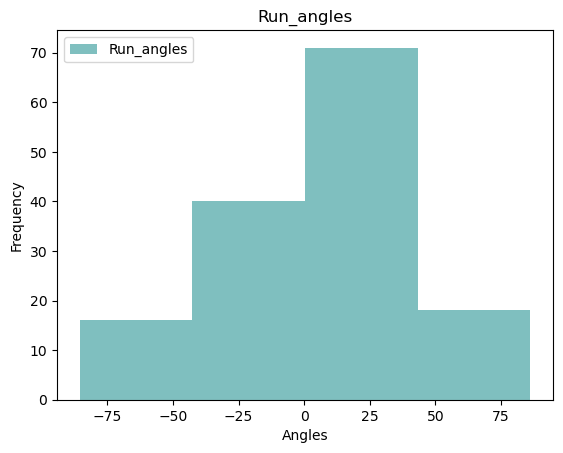

In [128]:
# Create a histogram for the "client starts" behavior
plt.hist(Run_angles , bins=4, color='teal', alpha=0.5, label='Run_angles')

# Set labels and title for the plot
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.title('Run_angles')

# Add a legend
plt.legend()

# Display the plot
plt.show()

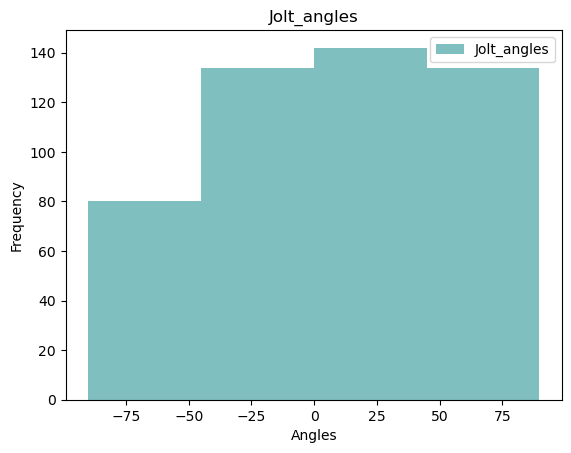

In [129]:
# Create a histogram for the "client starts" behavior
plt.hist(Jolt_angles , bins=4, color='teal', alpha=0.5, label='Jolt_angles')

# Set labels and title for the plot
plt.xlabel('Angles')
plt.ylabel('Frequency')
plt.title('Jolt_angles')

# Add a legend
plt.legend()

# Display the plot
plt.show()

## Velocity calculations

In [130]:
data_behavior_distance

,Interaction,Distance,Angle
0,background,86.555048,-10.668956
1,background,85.378071,-9.358138
2,background,84.780275,-8.762046
3,background,86.332363,-11.727043
4,background,87.736657,-9.132559
...,...,...,...
602739,background,567.203791,15.850214
602740,background,563.618712,16.118171
602741,background,564.922419,13.020733
602742,background,563.387447,10.476454


In [131]:
# Create a new column for the difference in distance between consecutive frames
data_behavior_distance['Distance_Difference'] = data_behavior_distance['Distance'].diff()

In [132]:
background_data_Distance_Diff = data_behavior_distance[data_behavior_distance['Interaction'] == 'background']
Int_client_data_Distance_Diff = data_behavior_distance[data_behavior_distance['Interaction'] == 'Int_Client']
TS_data_Distance_Diff = data_behavior_distance[data_behavior_distance['Interaction'] == 'TS']
Int_Cleaner_data_Distance_Diff = data_behavior_distance[data_behavior_distance['Interaction'] == 'Int_Cleaner']
Run_data_Distance_Diff = data_behavior_distance[data_behavior_distance['Interaction'] == 'Run']
Jolt_data_Distance_Diff = data_behavior_distance[data_behavior_distance['Interaction'] == 'Jolt']

# Get the angles for each behavior
background_Distance_Diff = background_data_Distance_Diff['Distance_Difference']
Int_Client_Distance_Diff = Int_client_data_Distance_Diff['Distance_Difference']
TS_Distance_Diff  = TS_data_Distance_Diff['Distance_Difference']
Int_Cleaner_Distance_Diff  = Int_Cleaner_data_Distance_Diff['Distance_Difference']
Run_Distance_Diff  = Run_data_Distance_Diff['Distance_Difference']
Jolt_Distance_Diff  = Jolt_data_Distance_Diff['Distance_Difference']

In [156]:
threshhold = 75
above_threshold_rows  = data_behavior_distance[data_behavior_distance["Distance_Difference"] > threshhold]
unique_interactions = above_threshold_rows["Interaction"].value_counts()
unique_interactions

background    2469
Jolt             3
Int_Client       3
Run              2
Name: Interaction, dtype: int64

In [157]:
for index, row in data_behavior_distance[data_behavior_distance["Distance_Difference"] > threshhold].iterrows():
    print("Row:", index)
    print(row)
    print("-----------------------")

Row: 4855
Interaction            background
Distance                116.12582
Angle                   -3.062218
Distance_Difference     78.998032
Name: 4855, dtype: object
-----------------------
Row: 5928
Interaction                  Jolt
Distance               147.731229
Angle                   44.483094
Distance_Difference     94.446987
Name: 5928, dtype: object
-----------------------
Row: 6643
Interaction            background
Distance               380.118415
Angle                  -53.273914
Distance_Difference    144.505499
Name: 6643, dtype: object
-----------------------
Row: 6646
Interaction            background
Distance               336.595285
Angle                  -66.403222
Distance_Difference     88.422005
Name: 6646, dtype: object
-----------------------
Row: 10154
Interaction            background
Distance               421.344696
Angle                   10.540793
Distance_Difference    387.128745
Name: 10154, dtype: object
-----------------------
Row: 10556
Interac

Row: 183388
Interaction            background
Distance                997.33138
Angle                  -41.679573
Distance_Difference     98.324578
Name: 183388, dtype: object
-----------------------
Row: 183707
Interaction            background
Distance               812.959645
Angle                   35.480812
Distance_Difference    126.239518
Name: 183707, dtype: object
-----------------------
Row: 183731
Interaction            background
Distance               806.476782
Angle                   17.538886
Distance_Difference    175.517922
Name: 183731, dtype: object
-----------------------
Row: 183740
Interaction            background
Distance               867.499407
Angle                   15.579396
Distance_Difference    128.485755
Name: 183740, dtype: object
-----------------------
Row: 183744
Interaction            background
Distance               704.005171
Angle                    18.10373
Distance_Difference    109.699728
Name: 183744, dtype: object
-----------------------


Interaction            background
Distance               482.774887
Angle                   16.866519
Distance_Difference    138.689144
Name: 325412, dtype: object
-----------------------
Row: 325428
Interaction            background
Distance                191.74317
Angle                   -49.30684
Distance_Difference      84.70431
Name: 325428, dtype: object
-----------------------
Row: 325430
Interaction            background
Distance               280.151854
Angle                  -71.793908
Distance_Difference      87.23116
Name: 325430, dtype: object
-----------------------
Row: 325433
Interaction            background
Distance               277.690655
Angle                   -59.51912
Distance_Difference     81.090518
Name: 325433, dtype: object
-----------------------
Row: 325434
Interaction            background
Distance               359.557296
Angle                   63.642156
Distance_Difference      81.86664
Name: 325434, dtype: object
-----------------------
Row: 325435


In [ ]:
###
##
###
##
###
##

In [133]:
import scipy.stats as stats

# Group DataFrame by interaction type
grouped_data = data_behavior_distance.groupby('Interaction')

# Extract distance values for each interaction type
interaction_types = data_behavior_distance['Interaction'].unique()
distances = [grouped_data.get_group(interaction)['Distance'] for interaction in interaction_types]

# Perform t-test for distance among different interaction types
statistic, p_value = stats.f_oneway(*distances)

# Evaluate the test result
if p_value < 0.05:
    print("There are significant differences in distance based on interaction type.")
else:
    print("There are no significant differences in distance based on interaction type.")

There are significant differences in distance based on interaction type.


In [134]:
from scipy.stats import pearsonr

# Drop rows with missing values in 'Distance' or 'Angle' columns
data_behavior_distance = data_behavior_distance.dropna(subset=['Distance', 'Angle'])

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(data_behavior_distance['Distance'], data_behavior_distance['Angle'])

# Evaluate the correlation coefficient and its significance
if abs(correlation) >= 0.3 and p_value < 0.05:
    print("There is a significant correlation between Distance and Angle.")
else:
    print("There is no significant correlation between Distance and Angle.")

There is no significant correlation between Distance and Angle.
